In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [8]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
cleveland_data = pd.read_csv('SVM/cleveland.csv', names = features)
hungary_data = pd.read_csv('SVM/hungary.csv', names = features)
switzerland_data = pd.read_csv('SVM/switzerland.csv', names = features)

In [9]:
print(cleveland_data.head())
print(hungary_data.head())
print(switzerland_data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  heartdisease  
0    3.0  0.0  6.0             0  
1    2.0  3.0  3.0             2  
2    2.0  2.0  7.0             1  
3    3.0  0.0  3.0             0  
4    1.0  0.0  3.0             0  
   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1    

In [10]:
#concatinating the data sets
tempdata = [cleveland_data, hungary_data, switzerland_data]
complete_data = pd.concat(tempdata)

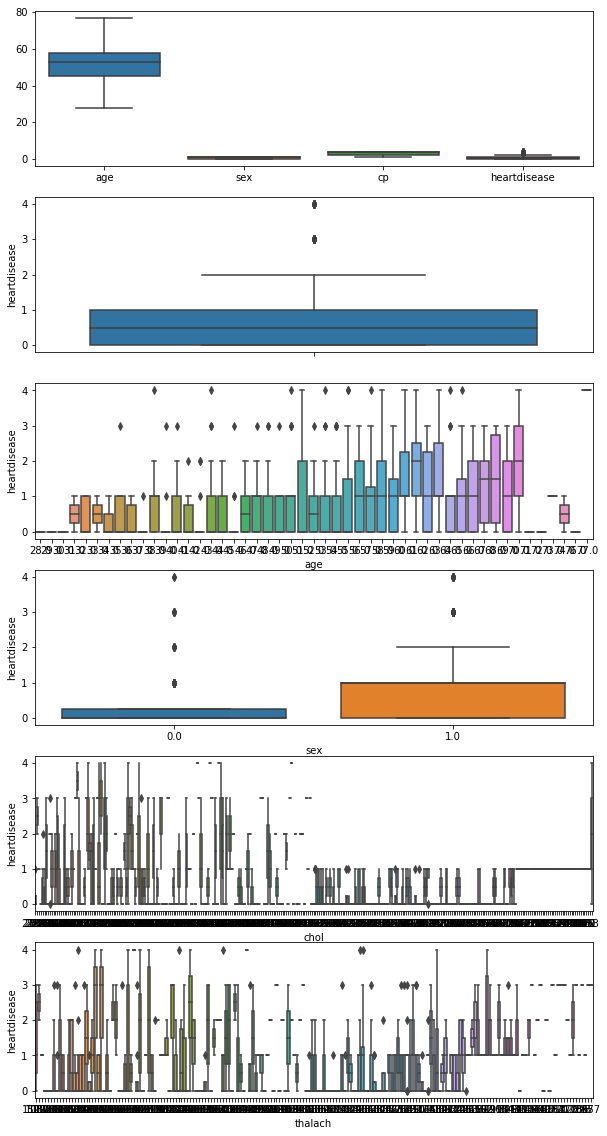

In [22]:
#Exploring the data
fig, axes = plt.subplots(nrows = 6, ncols = 1)
fig.set_size_inches(10, 20)
sn.boxplot(data = complete_data, orient = 'v', ax = axes[0])
sn.boxplot(data = complete_data, y = 'heartdisease', orient = 'v', ax = axes[1])
sn.boxplot(data = complete_data, y = 'heartdisease', x = 'age', orient = 'v', ax = axes[2])
sn.boxplot(data = complete_data, y = 'heartdisease', x = 'sex', orient = 'v', ax = axes[3])
sn.boxplot(data = complete_data, y = 'heartdisease', x = 'chol', orient = 'v', ax = axes[4])
sn.boxplot(data = complete_data, y = 'heartdisease', x = 'thalach', orient = 'v', ax = axes[5])

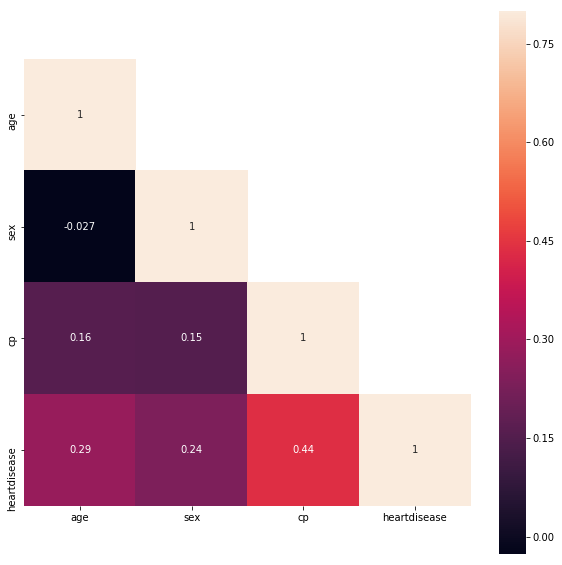

In [80]:
#correlation analysis
corrMatt = complete_data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sn.heatmap(corrMatt, mask = mask, vmax = .8, square = True, annot = True)

In [81]:
#preprocessing the data
data = complete_data.drop(['ca', 'slope', 'thal'], axis = 1)
data = data.replace('?', np.nan)

In [82]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0
5,56.0,1.0,2.0,120,236,0,0,178,0,0.8,0
6,62.0,0.0,4.0,140,268,0,2,160,0,3.6,3
7,57.0,0.0,4.0,120,354,0,0,163,1,0.6,0
8,63.0,1.0,4.0,130,254,0,2,147,0,1.4,2
9,53.0,1.0,4.0,140,203,1,2,155,1,3.1,1


In [83]:
import warnings
warnings.filterwarnings('ignore')
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputeddata = imp.fit_transform(data)

In [84]:
#test train split
X_train, X_test, Y_train, Y_test = train_test_split(imputeddata[:, :-1], imputeddata[:, -1], test_size = 0.05, random_state = 40)

In [85]:
#standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
#Build and train model
classifier = svm.SVC(kernel = 'rbf')
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)

In [87]:
#accuracy model
accuracy_score(Y_test, pred)

0.7222222222222222

In [88]:
classifier = svm.SVC(kernel = 'sigmoid')
classifier.fit(X_train, Y_train)
pred = classifier.predict(X_test)
accuracy_score(Y_test, pred)

0.6666666666666666